In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format='retina'

# Load data

This data has been webscraped or downloaded via API from goodreads.com. 

In [64]:
reviews_df = pd.read_csv('../data/reviews.csv')
books_df = pd.read_csv('../data/books.csv')

In [8]:
reviews_df.head()

,book_id,user_id,user_rating,user_review
0,1893,1,5,**spoiler alert** So the other day Elizabeth a...
1,5544,1,5,"This book was a pure delight. The subtitle ""Ad..."
2,2612,1,4,Really good book. It read like a bestseller (q...
3,368593,1,5,I found this book on a recommendation from a g...
4,20873740,1,5,"I haven't read a ton of ""history of the world""..."


In [9]:
books_df.head()

,id,best_id,title,author,description,year,num_pages,format,media_type,language,image_url,average_rating,rating_dist,ratings_count,text_reviews_count,shelves
0,1,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,The war against Voldemort is not going well; e...,2005.0,652.0,Paperback,book,eng,https://i.gr-assets.com/images/S/compressed.ph...,4.57,5:1598220|4:570051|3:163397|2:25942|1:10453|to...,2368063,38135,"{""fantasy"": 46663, ""favorites"": 39215, ""young-..."
1,10,10,"Harry Potter Collection (Harry Potter, #1-6)",J.K. Rowling,"Six years of magic, adventure, and mystery mak...",2005.0,3342.0,Hardcover,book,eng,https://i.gr-assets.com/images/S/compressed.ph...,4.73,5:24710|4:4399|3:1086|2:217|1:267|total:30679,30679,939,"{""favorites"": 373, ""fantasy"": 283, ""fiction"": ..."
2,10000191,22319275,Yellow Crocus,Laila Ibrahim,Mattie was never truly mine. That knowledge mu...,2010.0,229.0,Paperback,book,eng,https://s.gr-assets.com/assets/nophoto/book/11...,4.30,5:29248|4:21779|3:7066|2:1349|1:530|total:59972,59972,5434,"{""historical-fiction"": 894, ""fiction"": 377, ""k..."
3,10002296,10002296,Wildflower Hill,Kimberley Freeman,Forced to take her life in a new direction whe...,2010.0,524.0,Paperback,book,en-US,https://i.gr-assets.com/images/S/compressed.ph...,4.08,5:4206|4:5222|3:2138|2:361|1:113|total:12040,12040,1402,"{""historical-fiction"": 211, ""fiction"": 158, ""f..."
4,10006,10006,Oracle Night,Paul Auster,The discovery of a mysterious notebook turns a...,2004.0,245.0,NaN,book,eng,https://i.gr-assets.com/images/S/compressed.ph...,3.79,5:3023|4:5611|3:3745|2:821|1:164|total:13364,13364,810,"{""fiction"": 346, ""favorites"": 91, ""rory-gilmor..."


# Books analysis

In [10]:
books_df.drop(['id', 'best_id'], axis=1).describe()

,year,num_pages,average_rating,ratings_count,text_reviews_count
count,22442.000000,21416.000000,22498.000000,2.249800e+04,22498.000000
mean,1985.832279,351.738233,3.967309,9.139864e+04,4116.356654
std,135.605312,195.268691,0.271685,3.315884e+05,10206.231025
min,-1800.000000,0.000000,2.400000,4.600000e+01,1.000000
25%,1991.000000,253.000000,3.810000,8.221000e+03,465.000000
50%,2005.000000,334.000000,3.980000,1.736200e+04,1127.000000
75%,2011.000000,416.000000,4.160000,4.546075e+04,3005.000000
max,2020.000000,5216.000000,4.820000,6.824771e+06,170130.000000


In [11]:
num_of_books = books_df.loc[books_df.media_type == 'book'].count().id
print(f'There are {num_of_books} books in the dataframe after filtering out no book media.')

There are 22368 books in the dataframe after filtering out no book media.


In [12]:
not_best_edition_books = books_df.loc[books_df.id != books_df.best_id]
print(f'There are {not_best_edition_books.count().id} books which are not represented by its best editions.')

There are 3106 books which are not represented by its best editions.


In [54]:
books_df.language.unique()

array(['eng', nan, 'nl', 'per', 'spa', 'fre', 'ara', 'pol', 'mul', 'ind',
       'por', 'ger', 'rus', 'pes', 'swe', 'jpn', 'enm', '--', 'ita',
       'nor', 'tur', 'ira', 'vie'], dtype=object)

language
eng    19495
per      362
ara       65
fre       50
ind       47
spa       46
ger       18
por        6
mul        5
pes        4
rus        4
pol        3
nor        3
nl         3
jpn        3
ita        2
enm        1
vie        1
ira        1
tur        1
swe        1
--         1
Name: id, dtype: int64
There are 19495 books which have been written in english and 3003 in other language.


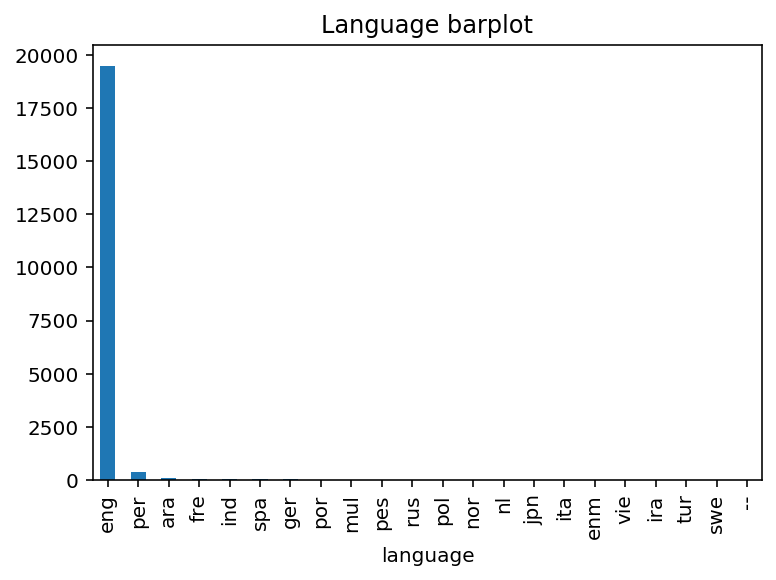

In [91]:
books_df.loc[books_df.language.isin([ 'eng', 'en-US', 'en-GB',  'en-CA', 'en' ]), 'language'] = 'eng'
languages = books_df.groupby(['language']).count().id.sort_values(ascending=False)
print(languages)
languages.plot.bar()
plt.title("Language barplot")
english_lang = books_df.loc[books_df.language == 'eng'].count().id
not_english_lang = books_df.loc[books_df.language != 'eng'].count().id
print(f'There are {english_lang} books which have been written in english and {not_english_lang} in other language.')

In [90]:
books_df.media_type.unique()

array(['book', nan, 'periodical', 'not a book', 'article'], dtype=object)

media_type
book          22368
periodical       32
not a book       25
article          10
Name: id, dtype: int64
There are 22368 books and 130 other media types.


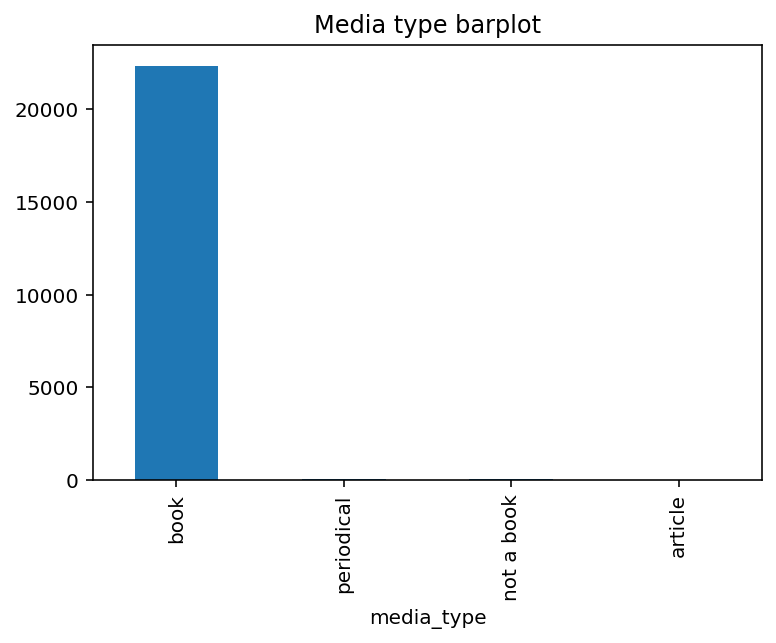

In [92]:
media_types = books_df.groupby(['media_type']).count().id.sort_values(ascending=False)
print(media_types)
media_types.plot.bar()
plt.title("Media type barplot")
book_type = books_df.loc[books_df.media_type == 'book'].count().id
not_book_type = books_df.loc[books_df.media_type != 'book'].count().id
print(f'There are {book_type} books and {not_book_type} other media types.')

In [93]:
books_df.format.unique()

array(['Paperback', 'Hardcover', nan, 'Kindle Edition', 'ebook',
       'Mass Market Paperback', 'Audio CD', 'Slipcased Hardcover',
       'Audio Cassette', 'Comics', 'Board Book', 'paperback',
       'Trade Paperback', 'Box Set', 'Paper back', 'Leather Bound',
       'Library Binding', 'Audible Audio', 'Nook', 'MP3 CD', 'Audiobook',
       'Comic Book', 'Broschiert', 'Science Fiction Book Club Omnibus',
       'Audio', 'Unknown Binding', 'رقعی', 'Paperback ', 'paper',
       'Slipcase Hardcover', 'Novelty Book', 'Softcover',
       'Paperback and online', 'Board book', 'Mass Market Paperback ',
       'Spiral-bound', 'Boxed Set', 'Loose-Leaf', 'コミック', 'Trade Paper',
       'pocket', 'Graphic Novel', 'Hardcover / گالینگور - وزیری'],
      dtype=object)

In [101]:
formats = books_df.groupby(['format']).count().id.sort_values(ascending=False)
print(formats)


format
Paperback                            10322
Hardcover                             6753
Mass Market Paperback                 1695
Kindle Edition                         823
ebook                                  432
Audio CD                                79
Audiobook                               34
Trade Paperback                         30
Comics                                  30
Board Book                              29
Audio Cassette                          18
Unknown Binding                         17
Library Binding                         11
Audible Audio                            9
paperback                                8
Leather Bound                            7
Paper back                               6
MP3 CD                                   5
Board book                               5
Slipcased Hardcover                      4
Nook                                     4
Spiral-bound                             3
paper                                    2
رقعی

Text(0.5, 1.0, 'Format barplot')

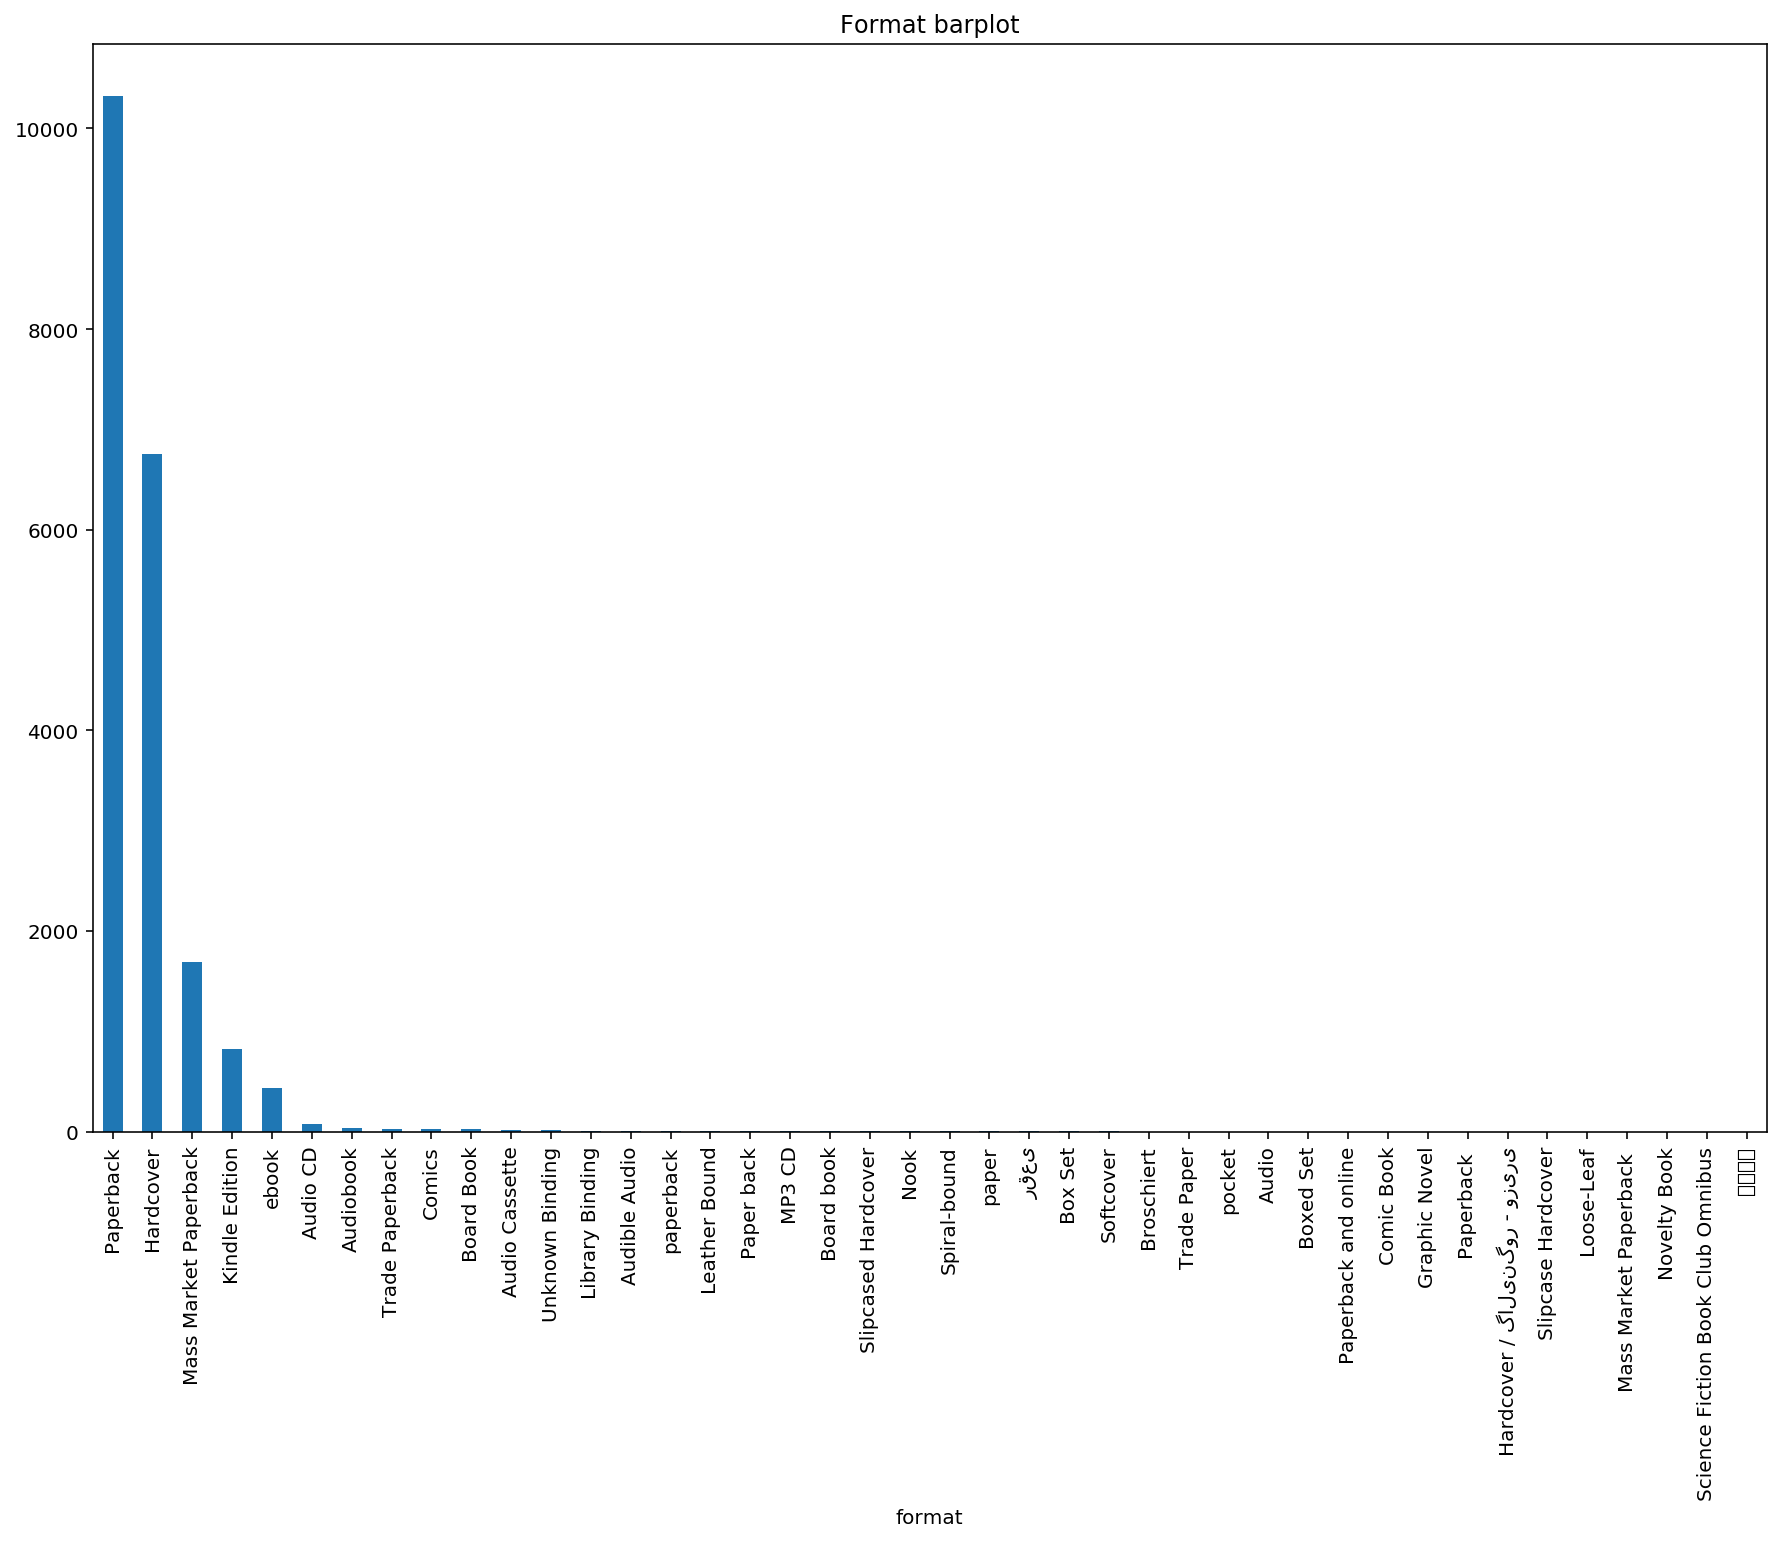

In [100]:
formats.plot.bar(figsize=(15,10))
plt.title("Format barplot")

## Numerical features' distributions

In [41]:
norm_pdf = lambda x, mu, sigma: np.exp(-((x-mu)/sigma)**2/2)/(np.sqrt(2*np.pi)*sigma)

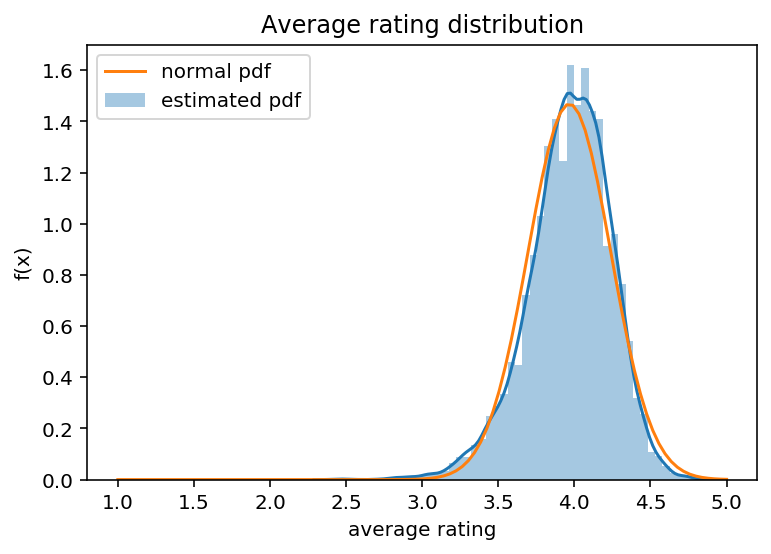

In [42]:
sns.distplot(books_df.average_rating.values, kde=True)
plt.title('Average rating distribution')
plt.xlabel('average rating')
plt.ylabel('f(x)')

x = np.linspace(1, 5, 100)
plt.plot(x, norm_pdf(x, books_df.average_rating.mean(), books_df.average_rating.std()))
plt.legend(['normal pdf', 'estimated pdf'])

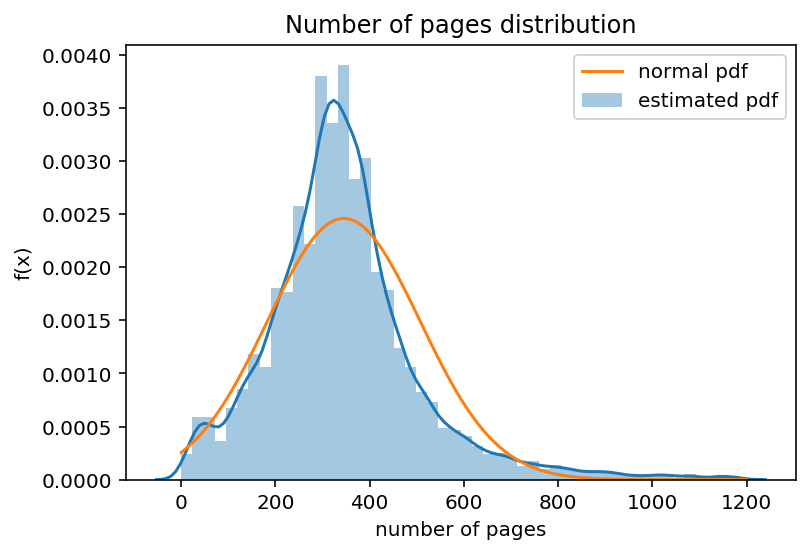

In [50]:
num_of_pages_threshold = 1200
partial_num_of_pages = books_df.num_pages[books_df.num_pages < num_of_pages_threshold]

sns.distplot(partial_num_of_pages.values, kde=True)
plt.title('Number of pages distribution')
plt.xlabel('number of pages')
plt.ylabel('f(x)')

x = np.linspace(books_df.num_pages.min(), num_of_pages_threshold, 100)
plt.plot(x, norm_pdf(x, partial_num_of_pages.mean(), partial_num_of_pages.std()))
plt.legend(['normal pdf', 'estimated pdf'])

In [52]:
#TODO: distributions of year, ratings_count, text_reviews_count; maybe without comparison to normal distribution

## Books popularity

In [96]:
popular_books_ids = reviews_df.groupby(['book_id']).count().user_id.sort_values(ascending=False)
books_by_popularity = books_df.set_index('id').reindex(popular_books_ids.index)
books_by_popularity.loc[:, ['title', 'author']].iloc[:10, :]

,title,author
book_id,,
3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling
2657,To Kill a Mockingbird,Harper Lee
4671,The Great Gatsby,F. Scott Fitzgerald
41865,"Twilight (Twilight, #1)",Stephenie Meyer
5107,The Catcher in the Rye,J.D. Salinger
968,"The Da Vinci Code (Robert Langdon, #2)",Dan Brown
5470,1984,George Orwell
2767052,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins
7613,Animal Farm,George Orwell


These are 10 most popular books based on downloaded sample of users readings.

In [97]:
#TODO: distribution of popularity (like below, but described)

In [3]:
reviews_df.sort_values(by='book_id').head(5)

,book_id,user_id,user_rating,user_review
432531,1,34621,5,None
518910,1,40749,5,None
19180,1,112687,4,None
767585,1,6525904,5,None
475564,1,3536464,5,None


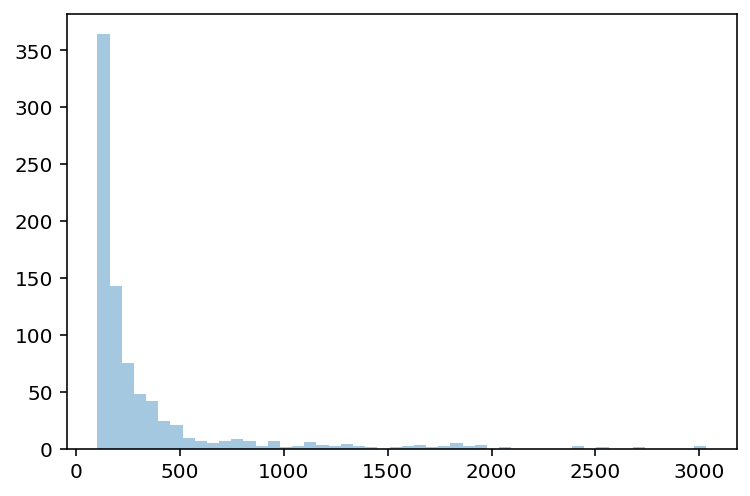

In [10]:
books_popularity = reviews_df.groupby(['book_id']).count()['user_id']
sns.distplot(books_popularity[books_popularity > 100].values, kde=False)

In [18]:
np.sum(books_popularity > 1)

22936

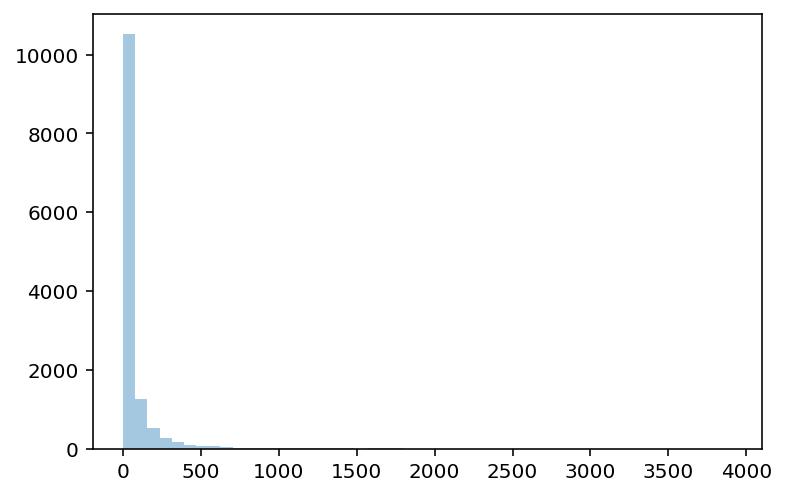

In [12]:
reviews_per_user = reviews_df.groupby(['user_id']).count()['book_id']
sns.distplot(reviews_per_user.values, kde=False)

In [33]:
reviews_df[reviews_df['book_id'] == 10]

,book_id,user_id,user_rating,user_review
39897,10,1627164,4,None
150382,10,4190,5,"yes, i had to post these. you can read them ea..."
153499,10,4674,5,None
155399,10,5,4,Come-on! It's Harry Potter!
170956,10,550,5,No explanation needed......
193903,10,689,5,None
199722,10,7818,5,Who can resist Harry? So sad the magic is comi...


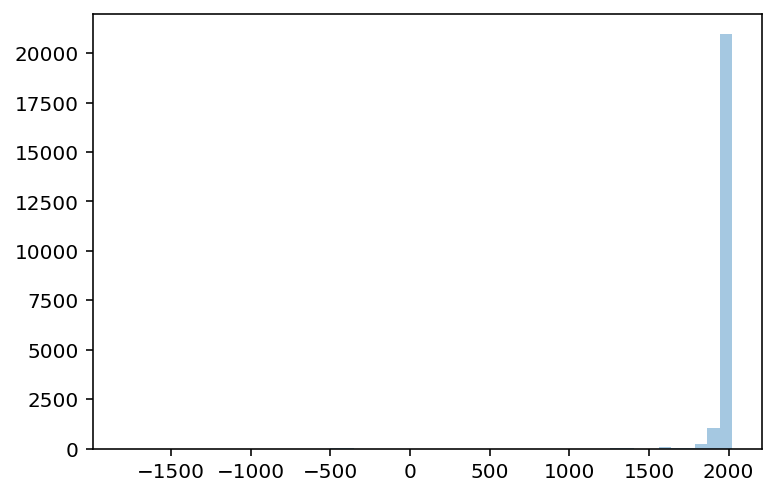

In [88]:
books_years = books_df.year
sns.distplot(books_years.values, kde=False)


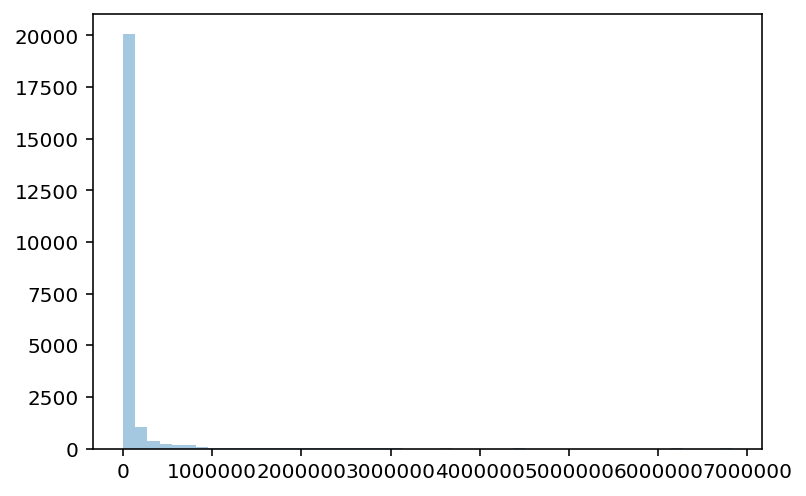

In [95]:
sns.distplot(books_df.ratings_count.values, kde=False)

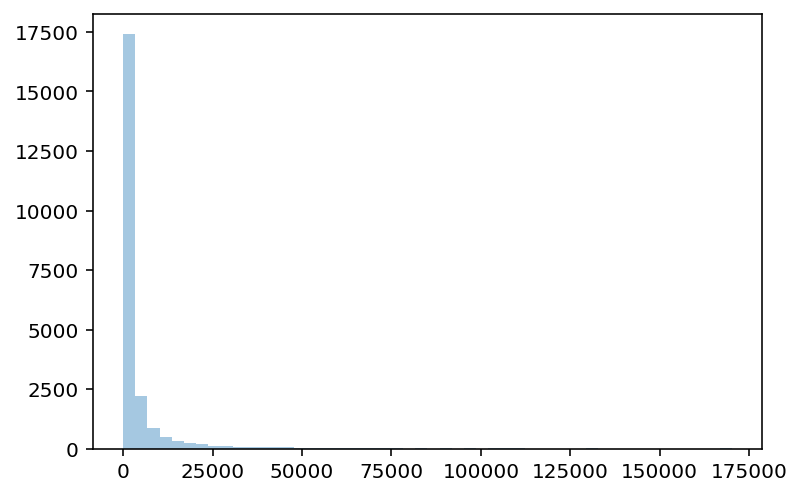

In [97]:
sns.distplot(books_df.text_reviews_count.values, kde=False)